In [4]:
# importing required libraires and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import mglearn
# formatting a figure size
font = {'family': 'monospace', 'weight': 'bold', 'size' : 25}
rc('font', **font)
plt.rcParams['figure.figsize'] = [20,10]
plt.rcParams['lines.linewidth'] = 5.0
plt.rcParams['lines.markersize'] = 15.0
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

    

In [6]:
# names of the columns 
names = ['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']
df = pd.read_csv('abalone.data',header = None, names = names)
df.head(10)

Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   
5   I   0.425     0.300   0.095        0.3515          0.1410          0.0775   
6   F   0.530     0.415   0.150        0.7775          0.2370          0.1415   
7   F   0.545     0.425   0.125        0.7680          0.2940          0.1495   
8   M   0.475     0.370   0.125        0.5095          0.2165          0.1125   
9   F   0.550     0.440   0.150        0.8945          0.3145          0.1510   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  
5         0.120      8  
6         0.330     20  
7         0.260     16  
8         0.165      9  
9         0.320     19

In [7]:
# to have a column defining years of the abalone : age = number of rings+ 1.5
df['years'] = df['Rings'] + 1.5
# to have numeric values for the sex we replace sex values with 0 for male, 1 for female and 2 for infants
df.replace(['M', 'F', 'I'], [0, 1, 2], inplace = True) # replace_dic = {'Sex' :{'M' : 0, 'F' : 1 , 'I': 2}} df.replace(replace_dic, inplace= True)
df

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0       0   0.455     0.365   0.095        0.5140          0.2245   
1       0   0.350     0.265   0.090        0.2255          0.0995   
2       1   0.530     0.420   0.135        0.6770          0.2565   
3       0   0.440     0.365   0.125        0.5160          0.2155   
4       2   0.330     0.255   0.080        0.2050          0.0895   
...   ...     ...       ...     ...           ...             ...   
4172    1   0.565     0.450   0.165        0.8870          0.3700   
4173    0   0.590     0.440   0.135        0.9660          0.4390   
4174    0   0.600     0.475   0.205        1.1760          0.5255   
4175    1   0.625     0.485   0.150        1.0945          0.5310   
4176    0   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  years  
0             0.1010        0.1500     15   16.5  
1             0.0485        0.0700      7    8.5  
2             0.1415        0.2100      9   10.5  
3             0.1140        0.1550     10   11.5  
4             0.0395        0.0550      7    8.5  
...              ...           ...    ...    ...  
4172          0.2390        0.2490     11   12.5  
4173          0.2145        0.2605     10   11.5  
4174          0.2875        0.3080      9   10.5  
4175          0.2610        0.2960     10   11.5  
4176          0.3765        0.4950     12   13.5  

[4177 rows x 10 columns]

In [8]:
# turn into numpy array to define x and y values for classification 
X = df.iloc[:,:8].values # all rows and columns except 9th column which is the year 
y_class = df.iloc[:,8].values
y_reg = df.iloc[:,9].values


## KNeighbor classifier

In [9]:
# classification case
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(X, y_class)


In [6]:
# calssification with Kneighbors
from sklearn.neighbors import KNeighborsClassifier
cls = KNeighborsClassifier(n_neighbors = 10)
cls.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [7]:
f'score of test_data for classifier case is {cls.score(x_test, y_test)}'

'score of test_data for classifier case is 0.261244019138756'

In [8]:
# for a list of number of neighbors between (1,100)
train_accuracy = []
test_accuracy = []
for n_neighbor in list(range(1,100)):
    cls = KNeighborsClassifier(n_neighbors = n_neighbor)
    cls.fit(x_train, y_train)
    train_accuracy.append(cls.score(x_train, y_train))
    test_accuracy.append(cls.score(x_test, y_test))
    
    

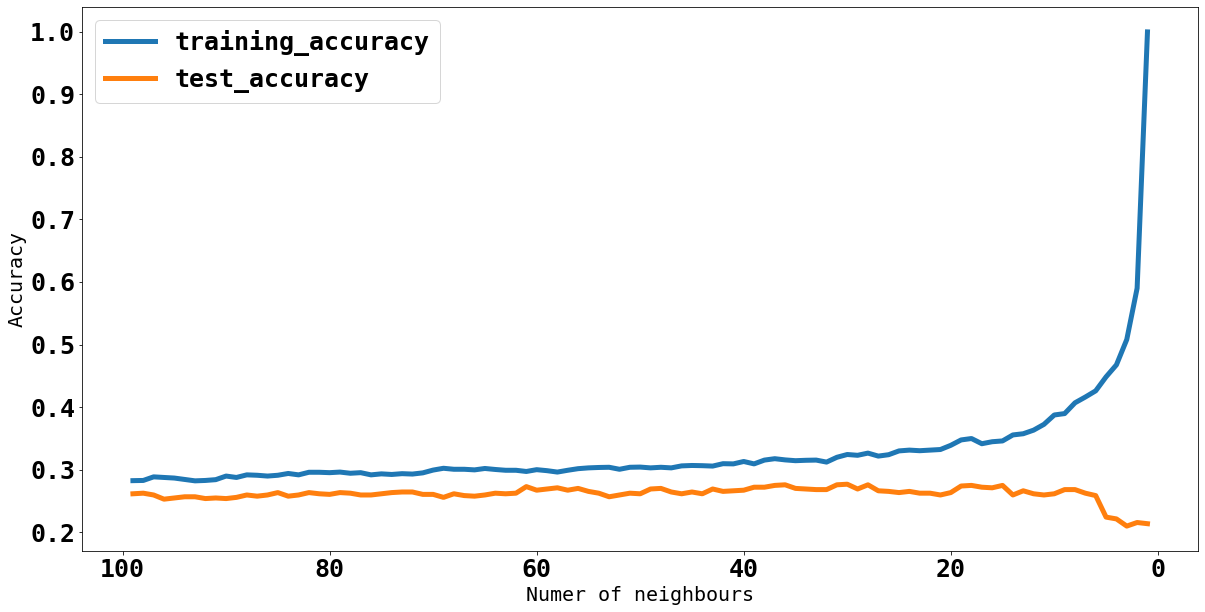

In [9]:
# plot the scores based on the number of neighbors

fig, ax = plt.subplots(figsize = (20,10))
n_neighbor = list(range(1,100))
fig1, = ax.plot(n_neighbor,train_accuracy, label = 'training_accuracy')
fig2, = ax.plot(n_neighbor,test_accuracy, label = 'test_accuracy')
legend  = ax.legend(handles = [fig1, fig2])
ax.set_xlabel('Numer of neighbours',size = 20)
ax.set_ylabel('Accuracy', size = 20)
plt.gca().invert_xaxis()
plt.show()

In [65]:
# to show the benchmark in two dimensions for three values for number of neighbors in the Kneighbor calssifier
def knn_test():
    x, y = mglearn.datasets.make_forge()
    fig, axs = plt.subplots(1,3)
    for n_neighbors, ax  in zip([1, 3, 9], axs):
        clf  = KNeighborsClassifier(n_neighbors  = n_neighbors).fit(x, y)
        mglearn.plots.plot_2d_separator(clf,x, fill = True,eps = 0.5, ax = ax,  alpha  = 0.4 )
        mglearn.discrete_scatter(x[:,0], x[:,1], y, ax = ax)
        ax.set_title(f'n_neighbor = {n_neighbors}')
        ax.set_xlabel('feature[0]')
        ax.set_ylabel('feature[1]')
        

    

C:\Users\nafis\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


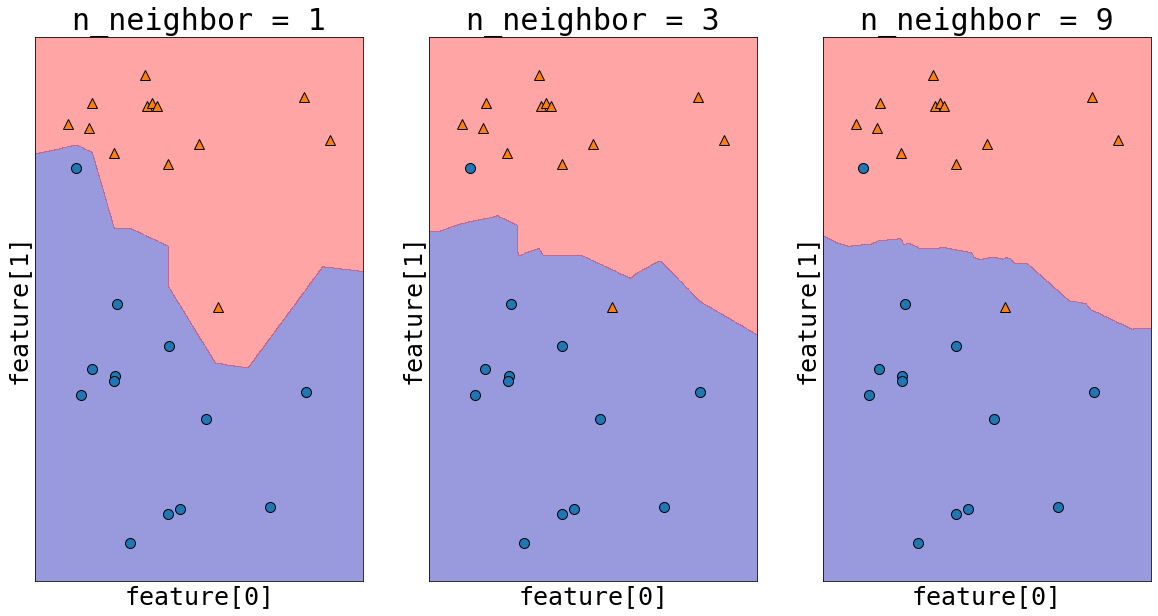

In [66]:
knn_test()

## KNeighbor regressor 


In [72]:
from  sklearn.neighbors import KNeighborsRegressor
X = df.iloc[:,:8].values # all rows and columns except 9th column which is the year 
y_reg = df.iloc[:,9].values
X_train, X_test, y_train, y_test = train_test_split(X, y_reg, random_state  = 0)
k_reg  = KNeighborsRegressor(n_neighbors = 10)
k_reg.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=10)

In [73]:
k_reg.score(X_train , y_train)

0.6168791369168005

In [74]:
k_reg.score(X_test, y_test)

0.5554848721039934

In [87]:
#function to take x, y and number of the neighbors and returned the corrosponding train and test accuracy
from  sklearn.neighbors import KNeighborsRegressor
def k_regressor(x, y, n_neighbors):
    X_train, X_test, y_train, y_test = train_test_split(X, y_reg, random_state=0)
    training_accuracy = []
    test_accuracy = []
    for k_neighbors in list(range(1,n_neighbors)):
        reg = KNeighborsRegressor(n_neighbors = k_neighbors)
        reg.fit(X_train, y_train)
        training_accuracy.append(reg.score(X_train, y_train))
        test_accuracy.append(reg.score(X_test, y_test))
        
    return training_accuracy, test_accuracy
            

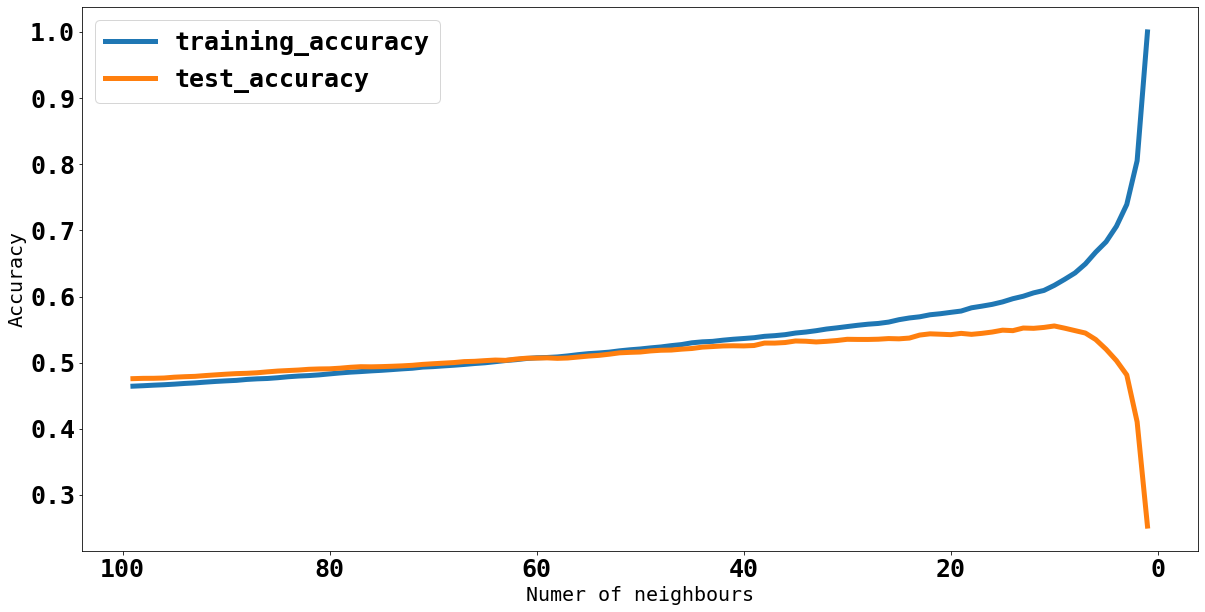

In [88]:
# plot the accuarcy of test and train sets based on number of the neighbors
n_neighbors = 100
x = X
y = y_reg
train_accuracy, test_accuracy = k_regressor(x, y, n_neighbors)
fig, ax = plt.subplots(figsize = (20,10))
n_neighbor = list(range(1,100))
fig1, = ax.plot(n_neighbor,train_accuracy, label = 'training_accuracy')
fig2, = ax.plot(n_neighbor,test_accuracy, label = 'test_accuracy')
legend  = ax.legend(handles = [fig1, fig2])
ax.set_xlabel('Numer of neighbours',size = 20)
ax.set_ylabel('Accuracy', size = 20)
plt.gca().invert_xaxis()
plt.show()

## Linear Models for Regression

   * Ordinary Least squares
   $$ \underset{w}{min\,} {|| X w - y||_2}^2  $$
      
   * Ridge (L2 regularization)
   $$  \underset{w}{min\,} {{|| X w - y||_2}^2 + \alpha {||w||_2}^2} $$
   
   * Lasso (L1 regularization)
   $$ \underset{w}{min\,} { \frac{1}{2n_{samples}} ||X w - y||_2 ^ 2 + \alpha ||w||_1} $$
   
   
If $X$ is a matrix of size $(n, p)$ this methods have a cost of $O(n p^2)$, assuming that $n \geq p$.

   * Elastic Net (L2 and L1 regularization)
   $$ \underset{w}{min\,} { \frac{1}{2n_{samples}} ||X w - y||_2 ^ 2 + \alpha \rho ||w||_1 + \frac{\alpha(1-\rho)}{2} ||w||_2 ^ 2} $$


In [10]:
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y_reg, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.53
Test set score: 0.54


In [11]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.53
Test set score: 0.54


In [44]:
# Decision tree
# classificatiON
# besed on male and female label the data

new_names = ['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings','Years']                
df_bin = df[df.Sex != 2] # to have just male and female a binary column of 0 and 1
X_bin = df_bin.iloc[:, 1:].values
y_bin = df_bin.iloc[:, 0].values
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
x_train, x_test,y_train, y_test = train_test_split(X_bin, y_bin, random_state = 0)
clf.fit(x_train, y_train)
print(f'the accuracy of training set the tree classifier is {clf.score(x_train, y_train)}')
print(f'the accuracy of the test set for tree classifier is {clf.score(x_test, y_test)}')
                                               

the accuracy of training set the tree classifier is 1.0
the accuracy of the test set for tree classifier is 0.5176304654442877


In [14]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

ridge01 = Ridge(alpha=0.01).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.48
Test set score: 0.51
Training set score: 0.53
Test set score: 0.54


In [19]:
def plot_ridge():
    plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
    plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
    plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.01")
    plt.plot(lr.coef_, 'o', label="LinearRegression")
    plt.xlabel("Coefficient index")
    plt.ylabel("Coefficient magnitude")
    plt.hlines(0, 0, len(lr.coef_))
    plt.ylim(-25, 25)
    plt.legend()

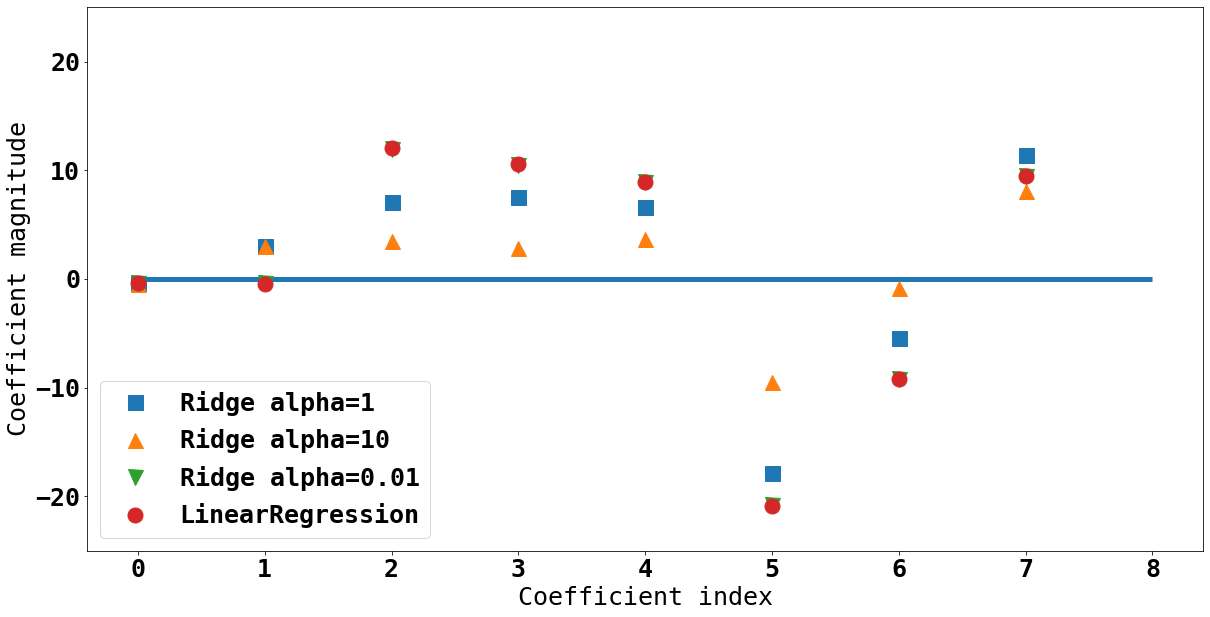

In [20]:
plot_ridge()

In [46]:
from sklearn.tree import export_graphviz
import pydotplus # To create our Decision Tree Graph
from IPython.display import Image
dot_data = export_graphviz(clf.fit(x_train, y_train),out_file = None, class_names = ['male','female'])
#Create Graph from DOT data
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

In [36]:
def plot_feature_importances(model):
    n_features = X_bin.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align = 'center')
    plt.yticks(np.arange(n_features), new_names)
    

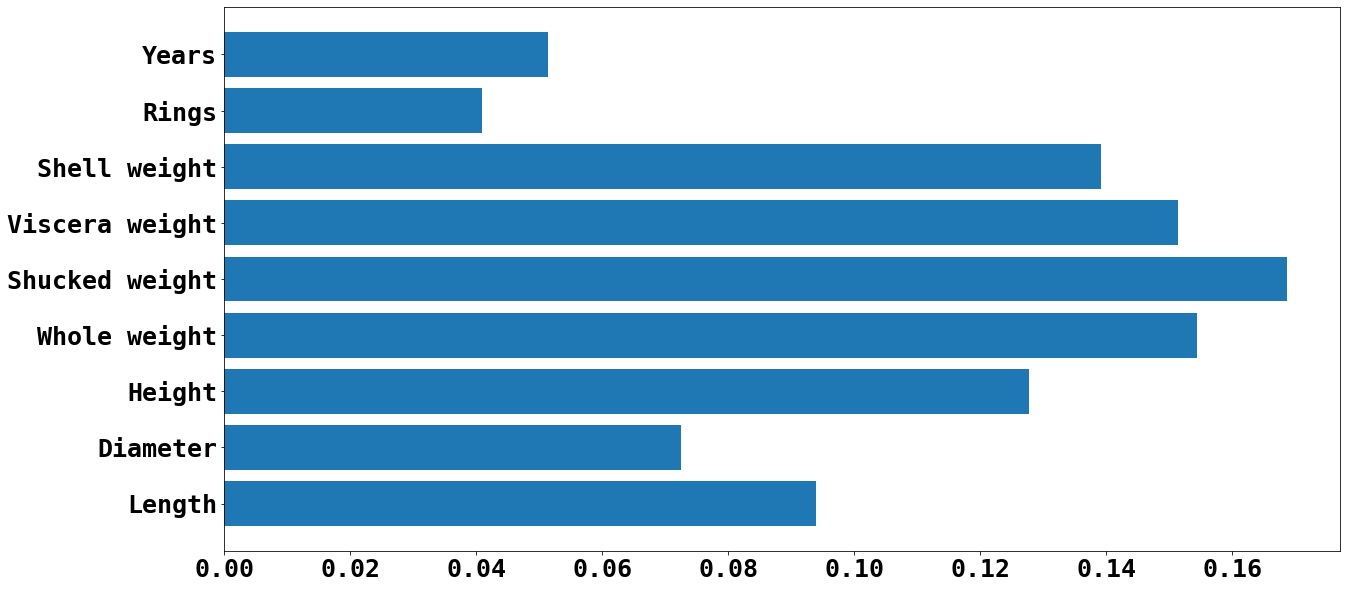

In [37]:
plot_feature_importances(clf)

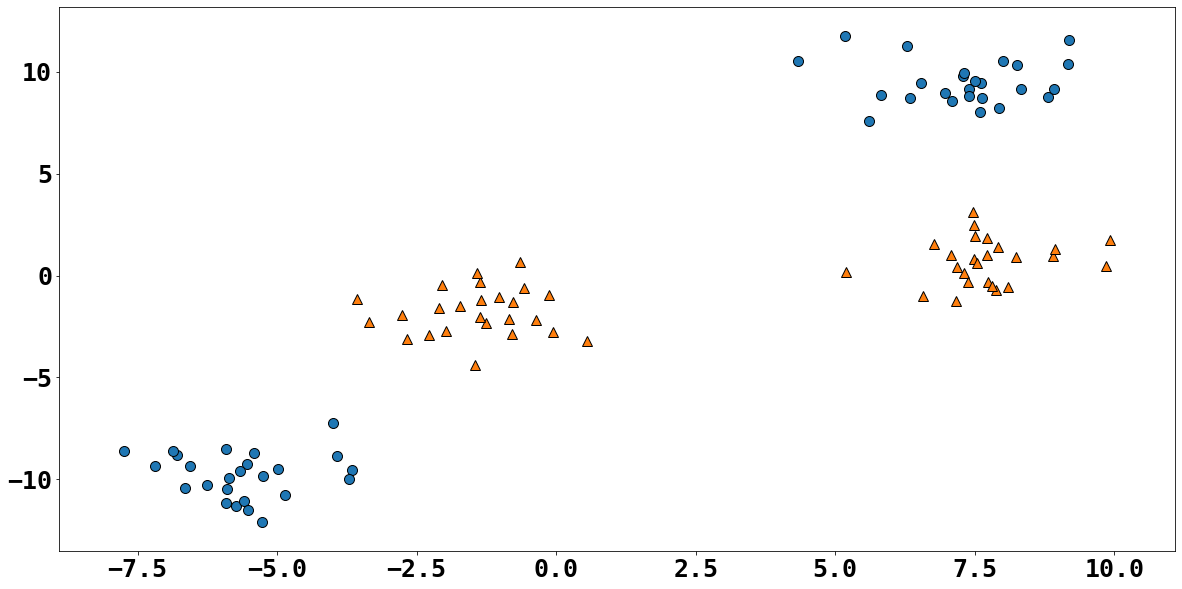

In [57]:
from sklearn.datasets import make_blobs # Generate isotropic Gaussian blobs for clustering
plt.rcParams ['lines.markersize'] = 25
X, y = make_blobs(centers=4,
                  random_state=8)
y =y%2
mglearn.discrete_scatter(X[:,0], X[:,1], y)